In [1]:
import pandas as pd                 # Library used for exporting wikipedia data in Dataframe format and filtering operations.
import matplotlib.pyplot as plt     # Library used for plotting.

In [314]:
wiki_link = "https://en.wikipedia.org/wiki/Comparison_of_mobile_operating_systems"


# Gather data from html
all_tables = pd.read_html(wiki_link, index_col=0)

# Tables needed in this assignment
about_OS_index, sound_and_voice_index = 0, 15

# Total tables
print(len(all_tables))

19


In [315]:
about_OS = all_tables[about_OS_index]
sound_and_voice = all_tables[sound_and_voice_index]
print(about_OS.columns)
print(sound_and_voice.columns)

Index(['Android', 'iOS', 'Tizen', 'Sailfish OS', 'Ubuntu Touch', 'Mobian[1]',
       'Plasma Mobile', 'PureOS', 'PostmarketOS', 'KaiOS', 'HarmonyOS'],
      dtype='object')
Index(['Android', 'iOS', 'Tizen', 'Sailfish OS', 'Ubuntu Touch', 'HarmonyOS'], dtype='object')


In [316]:
about_OS = about_OS[['Android', 'iOS', 'Tizen', 'Sailfish OS', 'Ubuntu Touch', 'HarmonyOS']]

In [317]:
print(about_OS.columns)
print(sound_and_voice.columns)

Index(['Android', 'iOS', 'Tizen', 'Sailfish OS', 'Ubuntu Touch', 'HarmonyOS'], dtype='object')
Index(['Android', 'iOS', 'Tizen', 'Sailfish OS', 'Ubuntu Touch', 'HarmonyOS'], dtype='object')


In [318]:
about_OS

,Android,iOS,Tizen,Sailfish OS,Ubuntu Touch,HarmonyOS
Feature,,,,,,
Developed by,"Google, Open Handset Alliance",Apple Inc.,"Linux Foundation, Tizen Association, Samsung, ...","Sailfish Alliance, Mer, Jolla and Sailfish com...",UBports and Ubuntu community contributors (pre...,Huawei
Market share[2][3],71.90%,27.33%,0.22%,NaN,NaN,4%
License,"Base system is free and open-source, but pract...","Proprietary, open source kernel and core",Partial; both proprietary and open-source comp...,"Free and open-source, but the UI and the SDK a...","Free and open-source, mainly the GPL[6]",Proprietary except for open-source components
Current version,13,16.0,4.0.0.7,4.3.0.15,16.04 OTA-22,3.0.0.76
Development version,14,16.1,6.0 M2,Unknown,Unknown,3.0.0
Current version release dates,"August 15, 2022; 5 months ago","September 12, 2022; 4 months ago","May 30, 2020; 2 years ago[7]","February 16, 2022; 11 months ago[8]","February 18, 2022; 11 months ago","July 27, 2022; 6 months ago"
OS family,Modified Linux kernel based,Darwin,Linux (based on a combination of Linux MeeGo a...,Linux,Linux (based on Ubuntu),Unix-like (based on Linux kernel multi-kernel ...
Supported CPU architecture,"ARM (32-bit ARMv7-A and 64-bit ARMv8-A only), ...",64-bit ARMv8-A only,"ARM, x86, x86-64","ARM, x86-64","ARM, x86-64","64-bit ARM, x86, x86-64"
Programmed in,"C, C++, Java, Kotlin","C, C++, Objective-C, Swift","C++, Xamarin.Forms (.NET C#, F#, VB[10])","C++, QML, Python","Apps: HTML5, QML, Go, JavaScript, C++ System: ...","C, C++, Java (until HMOS 3.0),JavaScript, eTS ..."


In [319]:
#rows Market share, Current version, and Supported CPU architecture from the first table in that section
about_OS = about_OS.transpose()

In [320]:
about_OS = about_OS[['Market share[2][3]', 'Current version',  'Supported CPU architecture']]
about_OS

Feature,Market share[2][3],Current version,Supported CPU architecture
Android,71.90%,13,"ARM (32-bit ARMv7-A and 64-bit ARMv8-A only), ..."
iOS,27.33%,16.0,64-bit ARMv8-A only
Tizen,0.22%,4.0.0.7,"ARM, x86, x86-64"
Sailfish OS,NaN,4.3.0.15,"ARM, x86-64"
Ubuntu Touch,NaN,16.04 OTA-22,"ARM, x86-64"
HarmonyOS,4%,3.0.0.76,"64-bit ARM, x86, x86-64"


In [321]:
about_OS.columns

Index(['Market share[2][3]', 'Current version', 'Supported CPU architecture'], dtype='object', name='Feature')

In [322]:
# Edit weird values with maximum values in Table 1
about_OS.rename(columns = {'Market share[2][3]':'% Market share'}, inplace = True)

In [336]:
about_OS

Feature,% Market share,Current version,Supported CPU architecture
Android,71.90,13,"ARM, x86, x86-64"
iOS,27.33,16.0,ARM
Tizen,0.22,4.0.0.7,"ARM, x86, x86-64"
Sailfish OS,0.00,4.3.0.15,"ARM, x86-64"
Ubuntu Touch,0.00,16.04 OTA-22,"ARM, x86-64"
HarmonyOS,4.00,3.0.0.76,"64-bit ARM, x86, x86-64"


In [324]:
about_OS['% Market share'] = about_OS['% Market share'].fillna(0)
about_OS['% Market share'] = about_OS['% Market share'].replace('71.90%',71.90)
about_OS['% Market share'] = about_OS['% Market share'].replace('27.33%',27.33) 
about_OS['% Market share'] = about_OS['% Market share'].replace('0.22%',0.22) 
about_OS['% Market share'] = about_OS['% Market share'].replace('4%',4) 

In [325]:
about_OS['Supported CPU architecture'][1]

'64-bit ARMv8-A only'

In [326]:
about_OS["Supported CPU architecture"] = about_OS["Supported CPU architecture"].replace('ARM (32-bit ARMv7-A and 64-bit ARMv8-A only), x86, x86-64[9]',
                                                                'ARM, x86, x86-64')


In [450]:
about_OS["Number of Supported CPU Architecture"] = [3, 1, 3,2,2,3]

In [452]:
about_OS.to_csv("about_OS.CSV")

In [412]:
about_OS["Current version"] = about_OS["Current version"].replace('4.0.0.7',4)
about_OS["Current version"] = about_OS["Current version"].replace('4.3.0.15',4.3)
about_OS["Current version"] = about_OS["Current version"].replace('4.3.0.15',4.3)
about_OS["Current version"] = about_OS["Current version"].replace('16.04 OTA-22',16.04)


In [417]:
about_OS["Current version"] = about_OS["Current version"].replace('3.0.0.76',3)
about_OS["Current version"] = about_OS["Current version"].astype(float)

In [418]:
about_OS["Supported CPU architecture"] = about_OS["Supported CPU architecture"].replace('64-bit ARMv8-A only','ARM')

In [419]:
about_OS["Supported CPU architecture"] = about_OS["Supported CPU architecture"].replace('64-bit ARM, x86, x86-64','ARM, x86, x86-64')

<AxesSubplot:>

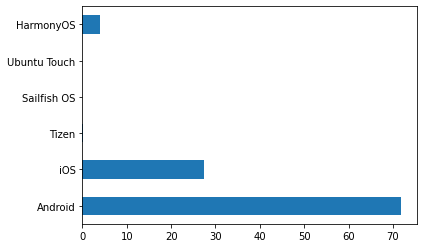

In [420]:
# about_OS['% Market share'].plot(kind = 'barh')
from matplotlib import pyplot
import random
x = [{i:random.randint(1,5)} for i in range(10)]
about_OS['% Market share'].plot(kind = 'barh', stacked=True)


<AxesSubplot:>

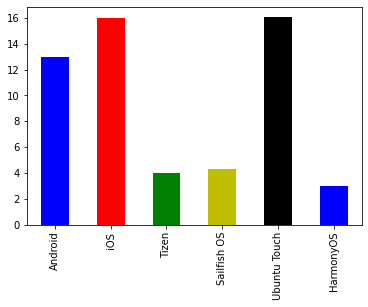

In [422]:
about_OS['Current version'].plot(kind='bar', stacked=True, color=my_colors)

<AxesSubplot:>

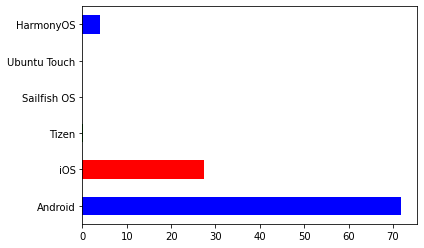

In [339]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np  # I find np.random.randint to be better

# Make the data
x = [{i:np.random.randint(1,5)} for i in range(10)]

# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(about_OS['% Market share'])))

# Specify this list of colors as the `color` option to `plot`.
about_OS['% Market share'].plot(kind='barh', stacked=True, color=my_colors)

In [ ]:
# df.groupby ('course_difficulty' ) ['course_Certificate_type'].value_counts()
df.groupby ('course_difficulty' ) ['course_Certificate_type'].value_counts()
about_OS['Supported CPU architecture'].value_counts().plot(kind = 'barh')

In [395]:

hashmap = {}
for (i,d) in about_OS.iterrows():
    hashmap[i] = []
    
    if 'ARM' in d['Supported CPU architecture']:
        hashmap[i].append('ARM')
    if 'x86' in d['Supported CPU architecture']:
        hashmap[i].append('x86')
    if 'x86-64' in d['Supported CPU architecture']:
        hashmap[i].append('x86-64')



#     for i in range(len(d["Supported CPU architecture"])):
#         if d["Supported CPU architecture"][i] == ",":
#             fe += 1
hashmap

{'Android': ['ARM', 'x86', 'x86-64'],
 'iOS': ['ARM'],
 'Tizen': ['ARM', 'x86', 'x86-64'],
 'Sailfish OS': ['ARM', 'x86', 'x86-64'],
 'Ubuntu Touch': ['ARM', 'x86', 'x86-64'],
 'HarmonyOS': ['ARM', 'x86', 'x86-64']}

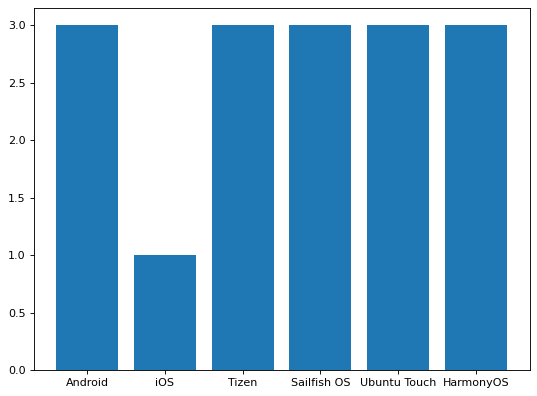

[3, 1, 3, 3, 3, 3]

In [411]:
plt.figure(figsize=(8, 6), dpi=80)
names = list(hashmap.keys())
values = hashmap.values()
lent = []
for val in hashmap.values():
    lent.append(len(val))
    
plt.bar(range(len(hashmap)), lent, tick_label=names)
plt.show()
lent

In [352]:
about_OS.groupby(about_OS.index)['Supported CPU architecture'].value_counts()

              Supported CPU architecture
Android       ARM, x86, x86-64              1
HarmonyOS     ARM, x86, x86-64              1
Sailfish OS   ARM, x86-64                   1
Tizen         ARM, x86, x86-64              1
Ubuntu Touch  ARM, x86-64                   1
iOS           ARM                           1
Name: Supported CPU architecture, dtype: int64

Text(0, 0.5, 'Supported CPU architecture')

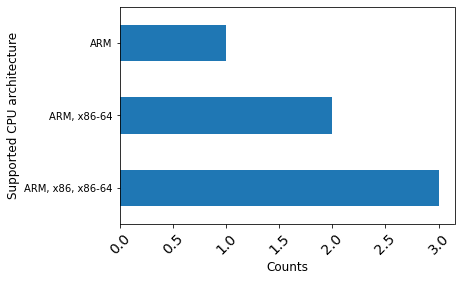

In [426]:
ax = about_OS['Supported CPU architecture'].value_counts().plot(kind = 'barh')
    
plt.xticks(rotation=45, horizontalalignment="center", fontsize=14)
plt.yticks(rotation=0, horizontalalignment="right", fontsize=10)
plt.xlabel("Counts", fontsize=12)
plt.ylabel("Supported CPU architecture", fontsize=12)


In [341]:
# about_OS['Supported CPU architecture']=about_OS['Supported CPU architecture'].astype(float)
about_OS['Supported CPU architecture']


Android         ARM, x86, x86-64
iOS                          ARM
Tizen           ARM, x86, x86-64
Sailfish OS          ARM, x86-64
Ubuntu Touch         ARM, x86-64
HarmonyOS       ARM, x86, x86-64
Name: Supported CPU architecture, dtype: object

In [ ]:
sound_and_voice["Current version"] = sound_and_voice["Current version"].replace('4.0.0.7',4)

In [433]:
sound_and_voice = sound_and_voice.replace(['6+[394]', '4.1+[396]', '5+ (Siri)', 'Yes[395]', '5+ (Siri)', '15+;[397]', 'Yes[224]'],
                                          [1,1,1,1,1,1,1])

In [435]:
sound_and_voice = sound_and_voice.replace(['Yes[392]','?'],
                                          [1,0])

In [437]:
sound_and_voice = sound_and_voice.replace(["Very limited (Doesn't work in background[398] and not voice controlled)",'3+: Limited (Not voice controlled)[399][400]', 'Partial'],
                                          [0.7,0.7, 0.7])

In [441]:
sound_and_voice = sound_and_voice.replace(['Disabled by default, must be interactively switched on during a call when enabled / 3rd party software[405]', '3rd party software'],[1,0.5])

In [448]:
sound_and_voice

,Android,iOS,Tizen,Sailfish OS,Ubuntu Touch,HarmonyOS
Feature,,,,,,
Separate volume for ringtone and media,1.0,1.0,0.0,1.0,1.0,1
Voice commands,1.0,1.0,0.0,0.5,0.0,1
Offline voice commands,1.0,1.0,0.0,0.0,0.0,0
Voice recognition,1.0,1.0,0.0,0.0,0.0,1
Offline voice recognition,1.0,1.0,0.0,0.0,0.0,1
Non-English voice recognition,1.0,1.0,0.0,0.0,0.0,1
Sound recorder,0.7,0.7,0.7,0.5,0.5,1
Call recorder,1.0,0.5,0.0,1.0,0.0,1
Sound trim,0.5,1.0,0.0,0.0,0.0,1


In [447]:
sound_and_voice = sound_and_voice.replace(['Yes[408]', '3rd party software, such as Saera[393]' ],
                                          [1,0.5])

In [ ]:
sound_and_voice = sound_and_voice.replace(['Yes, Phone by Google,[402] but also possible with 3rd party firmware[403]', 'No,[406] but 3rd party software available[407]'],
                                          [1,0.5])

In [ ]:
sound_and_voice = sound_and_voice.replace(['3rd party software[401]', '3rd party software[404]','3+: Limited (Not voice controlled)[399][400]'],
                                          [0.5,0.5, 0.5])

In [443]:
curr = about_OS['Current version'].to_frame()

In [76]:
curr = curr.transpose()


In [81]:
curr['Ubuntu Touch'][0].replace{('16.04 OTA-22': '16.04')}

SyntaxError: invalid syntax (2042740398.py, line 1)

In [ ]:
sound_and_voice.to_csv